<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Relationships Between State Expenditures and Academic Achievement </h3> </center>
<center><h4>Aditya Mohekar, Sanjana Mishra, Sumana Sithalam</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

  We completed our project on educational data to find relationships between expenditure and higher 8th grade test scores. This is important to understand how and why certain regions are “falling behind”. 

  Our dataset had relevant information, but we needed more. We added a column with instruction expenditure per capita, accounted for inflation, divided column values by relevant state population data, preprocessed our data, and conducted feature selection. We tested these algorithms: Linear Regression, Ridge, Lasso, kNN, and Linear SVM. We tested two outcomes - math and reading scores.

  After hyperparameter tuning and testing, we found kNN Regression yields the highest R-squared value for the outcomes, making it our final predictive algorithm. Consequently, we rejected our null hypothesis - the kNN Regression algorithm has equivalent performance to the other four tested models. The reading outcome R-squared values were high enough to possibly predict that score, but results were inconclusive for the math outcome. 




<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

  The US education system is falling behind globally - using data analysis and machine learning techniques, we can use any correlations between funding and academic achievement to determine the ideal amount of funding to improve academic achievement. Additionally, if we are able to truly understand the factors that influence academic achievement, we can provide a blueprint to equalize access to and quality of education across the states. This would better the current academic standing of the United States by providing students with the optimal learning environment. Having the ability to predict test scores based on educational expenditure can help us understand the role funding plays in a student’s academic success and can be considered the first step in improving the current state of the education system. 

  In this project, we are hoping to determine and predict the correlation between educational funding and test scores across different states over time. We want to learn how to implement correlation tests, supervised machine learning, applying the k-Nearest Neighbor Regression algorithm along with other machine learning algorithms in order to predict testing scores and draw associations between related variables.

Based on the problem statement mentioned above and its importance, we wanted to understand and attempt to answer the following questions and the hypothesis associated with them:
* Is there a correlation between higher education expenditure per capita and better student testing scores over time?
 * Null Hypothesis: There is zero correlation between education expenditure per capita and student test scores.
 * Alternative Hypothesis: There is a non-zero correlation between education expenditure per capita and student test scores.
* Do states with higher total revenue per capita tend to have better scores over time?
  * Null Hypothesis: There is zero correlation between states’ total revenue per capita and student test scores.
  * Alternative Hypothesis: There is a non-zero correlation between states’ total revenue per capita and student test scores.
* Does the k-Nearest Neighbor Regression model perform better than the Linear, Ridge, Lasso, and SVM Regression models?
  * Null Hypothesis: The k-Nearest Neighbor Regression algorithm shows no difference in performance as compared to the other ML algorithms we are testing. 
  * Alternative Hypothesis: The k-Nearest Neighbor Regression algorithm would perform significantly better than the other ML algorithms being tested.

### Extra Credit : Previous Work

Research has been done in this field, though not exactly attempting to do what we’ve done. One paper we were able to find, “A Study on Feature Selection Techniques in Educational Data Mining”, looks into ML applications in the educational field to extract information that will eventually benefit the student. The paper mentions how feature selection “influences the predictive accuracy of any performance model” and elaborated on how the researchers are looking to study student performance model with feature selection techniques (Ramaswami). The algorithms used in this case were classifier based - the researchers chose to use the Naive-Bayes algorithm as a baseline classifier. Based on the research done to optimize feature selection, the “expected outcomes show a reduction in computational time and construction cost in both training and classification phases of the students performance model”(Ramaswami). 

Additionally,  another paper, “Evaluating the effectiveness of educational data mining techniques for early prediction of student’s academic failure in introductory programming courses”, looks into a couple of different aspects of ML. The researchers looked into the effectiveness of different mining techniques to flag early predictors of students’ failures. Although four algorithms were tested (we had to pay to see this information), the algorithm that yielded the best results when it came to these predictors was the Support Vector Machine algorithm (Costa). Although this research was again different from ours, it fell into the same realm of applying ML to “educational” data. 
These two papers indicate that research is currently being done on ML algorithms and their interactions with educational datasets. In the same way that we are hoping to positively impact the educational world - or at least get a better understanding of what impacts student success - these researchers are trying to improve ML techniques to ensure that students can achieve academic success. 


Ramaswami, M., & Bhaskaran, R. (2009, December 19). A Study on Feature Selection Techniques in Educational Data Mining. Retrieved from https://arxiv.org/abs/0912.3924 

Costa, E. B., Fonseca, B., Santana, M. A., Araújo, F. F., & Rego, J. (2017, February 04). Evaluating the effectiveness of educational data mining techniques for early prediction of students academic failure in introductory programming courses. Retrieved from https://www.sciencedirect.com/science/article/abs/pii/S0747563217300596 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

  Our dataset was obtained from a dataset found on Kaggle containing a detailed breakdown of US education data, which was in turn derived from an amalgamation of US census data and data from the National Center for Education Statistics. The dataset can be found at: https://www.kaggle.com/noriuk/us-education-datasets-unification-project?select=states_all.csv

  The original unprocessed dataset that we used contains 25 columns/variables and 1716 rows. The various columns show the state; year;  total state revenue and expenditure, as well as their breakdowns into sub-categories such as instruction expenditure, capital outlay expenditure, etc.; number of enrolled students by grade level; and average 4th and 8th grade math and reading scores. Each row contains the data for an individual state in one particular year, with years ranging from 1992 to 2019, and states including all 50 states as well as some other US territories. 

In [ ]:
# Once the "Choose Files" prompt appears, select your kaggle.json file to proceed, which can be
# downloaded from your Kaggle account. 
# If running in Google Colab, run all starting from this block. If running in Jupyter notebook/Anaconda, follow
# the instructions in the cell below this one, and don't run this cell.
! pip install -q kaggle
from google.colab import files

files.upload()

In [211]:
# If running in Jupyter notebook, don't run the cell above, but run all below starting from this cell (Cell > Run All Below)
# Make sure that your kaggle.json is in the same directory as this .ipynb file
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [212]:
! kaggle datasets download -d noriuk/us-education-datasets-unification-project

us-education-datasets-unification-project.zip: Skipping, found more recently modified local copy (use --force to force download)


In [213]:
from zipfile import ZipFile
file_name = "us-education-datasets-unification-project.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [214]:
import pandas as pd
df = pd.read_csv("states_all.csv")

In [215]:
df

#columns we will delete: PRIMARY_KEY, GRADES_PK_G, GRADES_KG_G, GRADES_12_G, GRADES_1_8_G,	GRADES_9_12_G, GRADES_ALL_G, GRADES_4_G, AVG_READING_4_SCORE, AVG_MATH_4_SCORE
#rows we will delete: years less than 1993 and greater than 2016

PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          2653798.0   
1            106780.0       720711.0       222100.0           972488.0   
2            297888.0      1369815.0      1590376.0          3401580.0   
3            178571.0       958785.0       574603.0          1743022.0   
4           2072470.0     16546514.0      7641041.0         27138832.0   
...               ...            ...            ...                ...   
1710              NaN            NaN            NaN                NaN   
1711              NaN            NaN            NaN                NaN   
1712              NaN            NaN            NaN                NaN   
1713              NaN            NaN            NaN                NaN   
1714              NaN            NaN            NaN                NaN   

      INSTRUCTION_EXPENDITURE  ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  \
0                   1481703.0  ...     57948.0     58025.0      41167.0   
1                    498362.0  ...      9748.0      8789.0       6714.0   
2                   1435908.0  ...     55433.0     49081.0      37410.0   
3                    964323.0  ...     34632.0     36011.0      27651.0   
4                  14358922.0  ...    418418.0    363296.0     270675.0   
...                       ...  ...         ...         ...          ...   
1710                      NaN  ...         NaN         NaN          NaN   
1711                      NaN  ...         NaN         NaN          NaN   
1712                      NaN  ...         NaN         NaN          NaN   
1713                      NaN  ...         NaN         NaN          NaN   
1714                      NaN  ...         NaN         NaN          NaN   

      GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  \
0              NaN            NaN      731634.0             208.0   
1              NaN            NaN      122487.0               NaN   
2              NaN            NaN      673477.0             215.0   
3              NaN            NaN      441490.0             210.0   
4              NaN            NaN     5254844.0             208.0   
...            ...            ...           ...               ...   
1710           NaN            NaN           NaN             247.0   
1711           NaN            NaN           NaN             240.0   
1712           NaN            NaN           NaN             231.0   
1713           NaN            NaN           NaN             242.0   
1714           NaN            NaN           NaN             246.0   

      AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  
0                252.0                207.0                  NaN  
1                  NaN                  NaN                  NaN  
2                265.0                209.0                  NaN  
3                256.0                211.0                  NaN  
4                261.0                202.0                  NaN  
...                ...                  ...                  ...  
1710             287.0                224.0                2

In [216]:
# Fetch data representing the populations of each state from 1993-2016
df_state_pop = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSZ7Cfp0RZfOjmgTZ9OqCRt5kMvgx9VasqeeiOhTTQa4o5uXovhb0ZJ7c7NwEim6t7I9UTXoEw1fg8S/pub?gid=0&single=true&output=csv")
df_state_pop = df_state_pop.set_index('Year')
df_state_pop = df_state_pop.replace(',','', regex=True)
df_state_pop.columns = df_state_pop.columns.str.upper()
df_state_pop

ALABAMA  ALASKA  ARIZONA ARKANSAS CALIFORNIA COLORADO CONNECTICUT  \
Year                                                                      
1993  4194000  596993  3993000  2424000   31150000  3561000     3272000   
1994  4233000  600624  4148000  2451000   31320000  3654000     3268000   
1995  4263000  601345  4307000  2480000   31490000  3738000     3265000   
1996  4291000  604918  4432000  2505000   31780000  3813000     3267000   
1997  4321000  608846  4552000  2524000   32220000  3891000     3269000   
1998  4351000  615205  4667000  2538000   32680000  3969000     3273000   
1999  4369000  619500  4778000  2551000   33150000  4056000     3282000   
2000  4386000  622091  4883000  2576000   33630000  4137000     3298000   
2001  4463000  633538  5304000  2691000   34480000  4433000     3428000   
2002  4471000  641974  5451000  2704000   34870000  4503000     3448000   
2003  4490000  647671  5591000  2723000   35240000  4546000     3468000   
2004  4511000  659305  5759000  2746000   35540000  4596000     3474000   
2005  4543000  667114  5974000  2776000   35770000  4656000     3477000   
2006  4595000  675322  6191000  2815000   35950000  4748000     3485000   
2007  4634000  679893  6360000  2842000   36190000  4837000     3488000   
2008  4674000  685532  6499000  2867000   36540000  4929000     3503000   
2009  4707000  694690  6588000  2887000   36890000  5015000     3515000   
2010  4785437  713910  6407172  2921964   37319502  5047349     3579114   
2011  4799069  722128  6472643  2940667   37638369  5121108     3588283   
2012  4815588  730443  6554978  2952164   37948800  5192647     3594547   
2013  4830081  737068  6632764  2959400   38260787  5269035     3594841   
2014  4841799  736283  6730413  2967392   38596972  5350101     3594524   
2015  4852347  737498  6829676  2978048   38918045  5450623     3587122   
2016  4863525  741456  6941072  2989918   39167117  5539215     3578141   

     DELAWARE   FLORIDA   GEORGIA  ... SOUTH_DAKOTA TENNESSEE     TEXAS  \
Year                               ...                                    
1993   699475  13710000   6947000  ...       716258   5086000  18000000   
1994   708416  13960000   7061000  ...       723038   5163000  18340000   
1995   718265  14190000   7185000  ...       728251   5241000  18680000   
1996   727090  14430000   7308000  ...       730699   5314000  19010000   
1997   735024  14680000   7429000  ...       730855   5378000  19360000   
1998   744066  14910000   7546000  ...       730789   5433000  19710000   
1999   753538  15110000   7651000  ...       733133   5484000  20040000   
2000   762269  15330000   7748000  ...       737333   5534000  20390000   
2001   794954  16350000   8202000  ...       758803   5755000  21330000   
2002   804636  16860000   8311000  ...       761633   5802000  21710000   
2003   815525  16970000   8400000  ...       765980   5857000  22050000   
2004   827154  17370000   8518000  ...       773087   5919000  22410000   
2005   840296  17770000   8655000  ...       778775   5997000  22790000   
2006   853301  18080000   8854000  ...       786973   6090000  23360000   
2007   865314  18260000   9048000  ...       795521   6173000  23820000   
2008   876794  18410000   9230000  ...       803047   6240000  24290000   
2009   884124  18510000   9357000  ...       810814   6291000  24770000   
2010   899593  18845537   9711881  ...       816166   6355311  25241971   
2011   907381  19053237   9802431  ...       823579   6399291  25645629   
2012   915179  19297822   9901430  ...       833566   6453898  26084481   
2013   923576  19454621   9972479  ...       842316   6494340  26480226   
2014   932487  19845911  10067278  ...       849129   6541223  26964333   
2015   941252  20209042  10178447  ...       853988   6591170  27470056   
2016   948921  20613477  10301890  ...       862996   6646010  27914410   

         UTAH VERMONT VIRGINIA WASHINGTON WEST_VIRGINIA WISCONSIN WYOMING  
Year                        

### 2.2. Data Analysis
  For our first hypothesis of  “Is there a correlation between higher education expenditures and higher scores,” the independent variable is each state’s instruction expenditure, and the dependent variables are the Grade 8 Math and Reading scores.

  For our second hypothesis of  “Do states with higher total revenue per capita tend to have better scores over time,” the independent variable is each state’s total revenue per capita, and the dependent variables are the Grade 8 Math and Reading scores.

  When we hypothesized that the k-Nearest Neighbors Regressor would result in the best-fit predictive model, our independent variables are the columns/attributes selected from our feature selection algorithm, which were:

  * TOTAL_REV_PER_CAP

  * FEDERAL_REV_PER_CAP

  * LOCAL_REV_PER_CAP

  * TOTAL_EXP_PER_CAP

  * INSTR_EXP_PER_CAP

  * SUPPORT_SERVICES_EXP_PER_CAP

  * OTHER_EXP_PER_CAP

Our dependent variables are the Grade 8 Math and Reading scores.

  We hope our predictive model will be able to accurately predict 8th grade math and reading test scores. We have two outcome variables - 8th grade math score and 8th grade reading score - for which we build separate models  in order to understand whether different features affect their outcomes. We hope that the scores can be accurately predicted using the following features (these do not represent the actual feature names, just in terms that the lay man will understand) - Total Revenue per Capita, Federal Revenue per Capita, Local Revenue per Capita, Total Expenditure per Capita, Instruction Expenditure per Capita, Support Services Expenditure, and Other Expenditure per Capita. These were the features that were selected through our feature selection function of choice, SelectKBest(). We feel that these are important predictors because based on our pattern matching skills, more money in education means more resources available to students, which should lead to better student performance in examinations.

  This is a supervised ML problem because we are using labeled educational data in order to train an algorithm to make  predictions on new data points in the future. After we train our algorithm, we hope to be able to use it to predict previously unseen/unlabeled data. The sub-category of the learning task is regression, as we are trying to find the correlation between our features and outcome and use that to predict future scores, and we are not trying to categorize our data into defined groups. 

  The ML algorithms we are going to use include Linear Regression, Ridge, Lasso, kNN Regression and LinearSVC Regression. We are using these because we were genuinely curious to see which of these regression models would yield the best results. If there was a direct correlation, we felt that Linear Regression would be the best model. If there were many correlations between predictor variables, we felt that the Ridge model would be the best choice. If our feature selection returned a fewer number of features and thus a simpler dataset, we felt that the Lasso model had the potential to be a good model. If a pattern did exist among our dataset, we felt that the kNN model would be the best fit for this aim. SVM would be able to transform our data and find optimal oundaries between our outputs - therefore, we felt this model choice might be relevant to our objective if all else failed. The data we chose is not normally distributed, so we wanted to see which algorithm would work best with this kind of data. Additionally, we really wanted to understand the correlation between expenditure and test scores as we all come from different states and have different backgrounds when it comes to the education system. For this reason, we wanted to test out as many different types of algorithms as we could in order to get the best result. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

The following steps outline our process for getting our dataset into a form where we could proceed with our regression analysis: 

* Download the dataset
* DATASET CLEANING: Drop columns unnecessary to our objective (PRIMARY_KEY, GRADES_PK_G, GRADES_KG_G, GRADES_12_G, GRADES_1_8_G,	GRADES_9_12_G, GRADES_ALL_G, GRADES_4_G, avg 4 grades reading, avg 4 math) because we weren’t interested in predicting 4th grade scores, and decided that having grades 1-8, 9-12 or 1-12 was not relevant towards our analysis 
* DATASET CLEANING: Dropped rows unnecessary to our objective (years less than 1993 and greater than 2016, Department of Education columns, and National columns, and District of Columbia columns ) because the data hadn’t been collected completely
* FIXED NaN VALUES: Sorted by state in order to get all the states in alphabetical order and then backfilled the data if values were missing (did a pad just to make sure that we didn’t miss the first NAN column)
  * Went through and checked that no border data for a state was missing so we could successfully fill the NAN values without corrupting the data (ex: Alabama 2016 data was used to backfill Alaska 1993 data if the Alaska data was missing)
* APPLIED FUNCTION: Applied lambda function to each column dealing with cash values from 1993-2016 in order to account for inflation. We did this because we needed to normalize the cash values - 3000 dollars in 1993 is very different from 3000 dollars in 2016.
* Created a new dataset of state populations each year by hand in Excel in order to create new relevant columns 
  * We realized we needed a way to normalize the data before preprocessing since the states all had different primary industries (and therefore different revenues) and different populations 
* Set year to be the index of the new population dataset in order to make it easier to use this information to normalize our cash values 
* CREATED NEW FEATURES FROM EXISTING ONES: We divided each cash row by the population of that given state using apply and a lambda - we did this because we needed to normalize the cash values between the different states, because 3000 dollars over 100,000 people is very different than 3000 dollars over 1,000,000 people, and got our revenue per capita values 
* NORMALIZED FEATURES: Took the instruction_expenditure column and divided it by the total enrollment rate per state. We needed to do this in order to get the instruction expenditure per capita. We couldn’t just divide that column by the entire state population, because only those enrolled in school are benefitting from that funding 
* EXTRACTED FEATURES DATASET: Created a features dataset by dropping the average reading score column and average math score column because these are the outcome values we wanted to predict 
* EXTRACED OUTCOMES DATASETS: Created a targetMath dataset and a targetReading dataset to house our respective target variables - we needed this for our test_train split 
* PRE-PROCESSING: We preprocessed the data using MinMaxScalar for both targetMath and targetReading in order to normalize the values of the features dataset
* FEATURE SELECTION: Conducted feature selection for targetMath and targetReading in order to select the best features for the outcome 



In [217]:
df = df.drop(columns=["PRIMARY_KEY", "GRADES_PK_G", "GRADES_KG_G", "GRADES_12_G", "GRADES_1_8_G",	"GRADES_9_12_G", "GRADES_8_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_READING_4_SCORE", "GRADES_4_G"])
df

STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0           ALABAMA  1992     NaN      2678885.0         304177.0   
1            ALASKA  1992     NaN      1049591.0         106780.0   
2           ARIZONA  1992     NaN      3258079.0         297888.0   
3          ARKANSAS  1992     NaN      1711959.0         178571.0   
4        CALIFORNIA  1992     NaN     26260025.0        2072470.0   
...             ...   ...     ...            ...              ...   
1710       VIRGINIA  2019     NaN            NaN              NaN   
1711     WASHINGTON  2019     NaN            NaN              NaN   
1712  WEST_VIRGINIA  2019     NaN            NaN              NaN   
1713      WISCONSIN  2019     NaN            NaN              NaN   
1714        WYOMING  2019     NaN            NaN              NaN   

      STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0         1659028.0       715680.0          2653798.0   
1          720711.0       222100.0           972488.0   
2         1369815.0      1590376.0          3401580.0   
3          958785.0       574603.0          1743022.0   
4        16546514.0      7641041.0         27138832.0   
...             ...            ...                ...   
1710            NaN            NaN                NaN   
1711            NaN            NaN                NaN   
1712            NaN            NaN                NaN   
1713            NaN            NaN                NaN   
1714            NaN            NaN                NaN   

      INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
0                   1481703.0                      735036.0   
1                    498362.0                      350902.0   
2                   1435908.0                     1007732.0   
3                    964323.0                      483488.0   
4                  14358922.0                     8520926.0   
...                       ...                           ...   
1710                      NaN                           NaN   
1711                      NaN                           NaN   
1712                      NaN                           NaN   
1713                      NaN                           NaN   
1714                      NaN                           NaN   

      OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  AVG_MATH_8_SCORE  \
0                   NaN                    174053.0             252.0   
1                   NaN                     37451.0               NaN   
2                   NaN                    609114.0             265.0   
3                   NaN                    145212.0             256.0   
4                   NaN                   2044688.0             261.0   
...                 ...                         ...               ...   
1710                NaN                         NaN             287.0   
1711                NaN                         NaN             286.0   
1712                NaN                         NaN             272.0   
1713                NaN                         NaN             289.0   
1714                NaN                         NaN             286.0   

      AVG_READING_8_SCORE  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
1710                262.0  
1711                266.0  
1712                256.0  
1713                267.0  
1714                265.0  

[1715 rows x 14 columns]

In [218]:
df = df[df.YEAR >= 1993]
df = df[df.YEAR <= 2016]
df = df[df.STATE != "DODEA"]
df = df[df.STATE != "NATIONAL"]
df = df[df.STATE != 'DISTRICT_OF_COLUMBIA']
df = df.sort_values(by=["STATE"])
df

STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
51    ALABAMA  1993  727716.0      2827391.0         331409.0      1729295.0   
561   ALABAMA  2003  727900.0      5196054.0         567704.0      2966981.0   
816   ALABAMA  2008  742919.0      7726213.0         711391.0      4649053.0   
1224  ALABAMA  2016  734652.0      7498567.0         797631.0      4097696.0   
102   ALABAMA  1994  730004.0      2970223.0         331823.0      1850894.0   
...       ...   ...       ...            ...              ...            ...   
1019  WYOMING  2011   88165.0      1650621.0         154955.0       878979.0   
1070  WYOMING  2012   89994.0      1664983.0         144728.0       851896.0   
1121  WYOMING  2013   91533.0      1695967.0         113501.0       881114.0   
611   WYOMING  2003   85966.0       962240.0          84308.0       489199.0   
1274  WYOMING  2016   94511.0      2044669.0         123012.0      1175899.0   

      LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
51         766687.0          2833433.0                1564558.0   
561       1661369.0          5298932.0                2817111.0   
816       2365769.0          7847387.0                3947003.0   
1224      2603240.0          7708845.0                3865453.0   
102        787506.0          3103266.0                1697593.0   
...             ...                ...                      ...   
1019       616687.0          1656850.0                 825783.0   
1070       668359.0          1670728.0                 845801.0   
1121       701352.0          1675477.0                 846872.0   
611        388733.0           915515.0                 473447.0   
1274       745758.0          2034229.0                 921494.0   

      SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
51                        794146.0           237222.0   
561                      1521462.0           424662.0   
816                      2373070.0           564746.0   
1224                     2439634.0           602452.0   
102                       826442.0           306977.0   
...                            ...                ...   
1019                      528352.0            52046.0   
1070                      540510.0            53299.0   
1121                      546422.0            52001.0   
611                       292271.0            27608.0   
1274                      585700.0            53570.0   

      CAPITAL_OUTLAY_EXPENDITURE  AVG_MATH_8_SCORE  AVG_READING_8_SCORE  
51                      204207.0               NaN                  NaN  
561                     432279.0             262.0                253.0  
816                     816799.0               NaN                  NaN  
1224                    610743.0               NaN                  NaN  
102                     231508.0               NaN                  NaN  
...                          ...               ...                  ...  
1019                    234408.0             288.0                270.0  
1070                    213245.0               NaN                  NaN  
1121                    213920.0             288.0                271.0  
611                     110312.0             284.0                267.0  
1274                    454302.0               NaN                  NaN  

[1200 rows x 14 columns]

In [219]:
df = df.fillna(method="pad")
df = df.fillna(method="bfill")
df

STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
51    ALABAMA  1993  727716.0      2827391.0         331409.0      1729295.0   
561   ALABAMA  2003  727900.0      5196054.0         567704.0      2966981.0   
816   ALABAMA  2008  742919.0      7726213.0         711391.0      4649053.0   
1224  ALABAMA  2016  734652.0      7498567.0         797631.0      4097696.0   
102   ALABAMA  1994  730004.0      2970223.0         331823.0      1850894.0   
...       ...   ...       ...            ...              ...            ...   
1019  WYOMING  2011   88165.0      1650621.0         154955.0       878979.0   
1070  WYOMING  2012   89994.0      1664983.0         144728.0       851896.0   
1121  WYOMING  2013   91533.0      1695967.0         113501.0       881114.0   
611   WYOMING  2003   85966.0       962240.0          84308.0       489199.0   
1274  WYOMING  2016   94511.0      2044669.0         123012.0      1175899.0   

      LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
51         766687.0          2833433.0                1564558.0   
561       1661369.0          5298932.0                2817111.0   
816       2365769.0          7847387.0                3947003.0   
1224      2603240.0          7708845.0                3865453.0   
102        787506.0          3103266.0                1697593.0   
...             ...                ...                      ...   
1019       616687.0          1656850.0                 825783.0   
1070       668359.0          1670728.0                 845801.0   
1121       701352.0          1675477.0                 846872.0   
611        388733.0           915515.0                 473447.0   
1274       745758.0          2034229.0                 921494.0   

      SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
51                        794146.0           237222.0   
561                      1521462.0           424662.0   
816                      2373070.0           564746.0   
1224                     2439634.0           602452.0   
102                       826442.0           306977.0   
...                            ...                ...   
1019                      528352.0            52046.0   
1070                      540510.0            53299.0   
1121                      546422.0            52001.0   
611                       292271.0            27608.0   
1274                      585700.0            53570.0   

      CAPITAL_OUTLAY_EXPENDITURE  AVG_MATH_8_SCORE  AVG_READING_8_SCORE  
51                      204207.0             262.0                253.0  
561                     432279.0             262.0                253.0  
816                     816799.0             262.0                253.0  
1224                    610743.0             262.0                253.0  
102                     231508.0             262.0                253.0  
...                          ...               ...                  ...  
1019                    234408.0             288.0                270.0  
1070                    213245.0             288.0                270.0  
1121                    213920.0             288.0                271.0  
611                     110312.0             284.0                267.0  
1274                    454302.0             284.0                267.0  

[1200 rows x 14 columns]

In [220]:
# This is the library we are using to adjust our monetary data points according to their respective inflation indices
! pip install cpi

In [221]:
import cpi

df["TOTAL_REVENUE"] = df.apply(lambda row : cpi.inflate(row["TOTAL_REVENUE"], row["YEAR"], to=2016), axis=1)

df["FEDERAL_REVENUE"] = df.apply(lambda row : cpi.inflate(row["FEDERAL_REVENUE"], row["YEAR"], to=2016), axis=1)
df["STATE_REVENUE"] = df.apply(lambda row : cpi.inflate(row["STATE_REVENUE"], row["YEAR"], to=2016), axis=1)
df["LOCAL_REVENUE"] = df.apply(lambda row : cpi.inflate(row["LOCAL_REVENUE"], row["YEAR"], to=2016), axis=1)
df["TOTAL_EXPENDITURE"] = df.apply(lambda row : cpi.inflate(row["TOTAL_EXPENDITURE"], row["YEAR"], to=2016), axis=1)
df["INSTRUCTION_EXPENDITURE"] = df.apply(lambda row : cpi.inflate(row["INSTRUCTION_EXPENDITURE"], row["YEAR"], to=2016), axis=1)
df["SUPPORT_SERVICES_EXPENDITURE"] = df.apply(lambda row : cpi.inflate(row["SUPPORT_SERVICES_EXPENDITURE"], row["YEAR"], to=2016), axis=1)
df["OTHER_EXPENDITURE"] = df.apply(lambda row : cpi.inflate(row["OTHER_EXPENDITURE"], row["YEAR"], to=2016), axis=1)
df["CAPITAL_OUTLAY_EXPENDITURE"] = df.apply(lambda row : cpi.inflate(row["CAPITAL_OUTLAY_EXPENDITURE"], row["YEAR"], to=2016), axis=1)

df = df.astype({"TOTAL_REVENUE":int, "FEDERAL_REVENUE":int, "STATE_REVENUE":int, "LOCAL_REVENUE":int, "TOTAL_EXPENDITURE":int,
                "INSTRUCTION_EXPENDITURE":int, "SUPPORT_SERVICES_EXPENDITURE":int, "OTHER_EXPENDITURE":int, "CAPITAL_OUTLAY_EXPENDITURE":int})

df = df.reset_index(drop=True)
df_og_prices = df
df

STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0     ALABAMA  1993  727716.0        4696149           550453        2872269   
1     ALABAMA  2003  727900.0        6777659           740505        3870088   
2     ALABAMA  2008  742919.0        8612723           793016        5182488   
3     ALABAMA  2016  734652.0        7498567           797631        4097696   
4     ALABAMA  1994  730004.0        4810218           537380        2997486   
...       ...   ...       ...            ...              ...            ...   
1195  WYOMING  2011   88165.0        1761191           165334         937859   
1196  WYOMING  2012   89994.0        1740496           151291         890532   
1197  WYOMING  2013   91533.0        1747292           116935         907779   
1198  WYOMING  2003   85966.0        1255132           109970         638104   
1199  WYOMING  2016   94511.0        2044669           123012        1175899   

      LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0           1273427            4706185                  2598649   
1           2167066            6911852                  3674599   
2           2637218            8747801                  4399884   
3           2603240            7708845                  3865453   
4           1275350            5025678                  2749218   
...             ...                ...                      ...   
1195         657997            1767837                   881099   
1196         698671            1746502                   884161   
1197         722577            1726182                   872500   
1198         507057            1194184                   617557   
1199         745758            2034229                   921494   

      SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                          1319035             394013   
1                          1984573             553923   
2                          2645357             629545   
3                          2439634             602452   
4                          1338406             497143   
...                            ...                ...   
1195                        563744              55532   
1196                        565024              55716   
1197                        562958              53574   
1198                        381234              36011   
1199                        585700              53570   

      CAPITAL_OUTLAY_EXPENDITURE  AVG_MATH_8_SCORE  AVG_READING_8_SCORE  
0                         339177             262.0                253.0  
1                         563858             262.0                253.0  
2                         910519             262.0                253.0  
3                         610743             262.0                253.0  
4                         374922             262.0                253.0  
...                          ...               ...                  ...  
1195                      250110             288.0                270.0  
1196                      222916             288.0                270.0  
1197                      220393             288.0                271.0  
1198                      143889             284.0                267.0  
1199                      454302             284.0                267.0  

[1200 rows x 14 columns]

In [222]:
def divide_per_capita(row):
    state = row.STATE
    year = row.YEAR
    pop_for_that_yr_and_state = int (df_state_pop.loc[year, state])
    row.TOTAL_REVENUE = row.TOTAL_REVENUE / pop_for_that_yr_and_state
    row.FEDERAL_REVENUE = row.FEDERAL_REVENUE / pop_for_that_yr_and_state
    row.STATE_REVENUE = row.STATE_REVENUE / pop_for_that_yr_and_state
    row.LOCAL_REVENUE = row.LOCAL_REVENUE / pop_for_that_yr_and_state
    row.TOTAL_EXPENDITURE = row.TOTAL_EXPENDITURE / pop_for_that_yr_and_state
    row.SUPPORT_SERVICES_EXPENDITURE = row.SUPPORT_SERVICES_EXPENDITURE / pop_for_that_yr_and_state
    row.OTHER_EXPENDITURE = row.OTHER_EXPENDITURE / pop_for_that_yr_and_state
    row.CAPITAL_OUTLAY_EXPENDITURE = row.CAPITAL_OUTLAY_EXPENDITURE / pop_for_that_yr_and_state
    return row

df = df.apply(lambda row : (divide_per_capita(row)), axis=1)
df

STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0     ALABAMA  1993  727716.0       1.119730         0.131248       0.684852   
1     ALABAMA  2003  727900.0       1.509501         0.164923       0.861935   
2     ALABAMA  2008  742919.0       1.842688         0.169665       1.108791   
3     ALABAMA  2016  734652.0       1.541797         0.164003       0.842536   
4     ALABAMA  1994  730004.0       1.136361         0.126950       0.708123   
...       ...   ...       ...            ...              ...            ...   
1195  WYOMING  2011   88165.0       3.104520         0.291441       1.653201   
1196  WYOMING  2012   89994.0       3.020095         0.262519       1.545244   
1197  WYOMING  2013   91533.0       3.001591         0.200877       1.559431   
1198  WYOMING  2003   85966.0       2.515975         0.220440       1.279112   
1199  WYOMING  2016   94511.0       3.499857         0.210559       2.012785   

      LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0          0.303631           1.122123                  2598649   
1          0.482643           1.539388                  3674599   
2          0.564231           1.871588                  4399884   
3          0.535258           1.585032                  3865453   
4          0.301288           1.187262                  2749218   
...             ...                ...                      ...   
1195       1.159877           3.116235                   881099   
1196       1.212329           3.030517                   884161   
1197       1.241281           2.965327                   872500   
1198       1.016421           2.393802                   617557   
1199       1.276513           3.481987                   921494   

      SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                         0.314505           0.093947   
1                         0.441998           0.123368   
2                         0.565973           0.134691   
3                         0.501618           0.123871   
4                         0.316184           0.117445   
...                            ...                ...   
1195                      0.993733           0.097888   
1196                      0.980425           0.096678   
1197                      0.967079           0.092032   
1198                      0.764203           0.072186   
1199                      1.002542           0.091696   

      CAPITAL_OUTLAY_EXPENDITURE  AVG_MATH_8_SCORE  AVG_READING_8_SCORE  
0                       0.080872             262.0                253.0  
1                       0.125581             262.0                253.0  
2                       0.194805             262.0                253.0  
3                       0.125576             262.0                253.0  
4                       0.088571             262.0                253.0  
...                          ...               ...                  ...  
1195                    0.440879             288.0                270.0  
1196                    0.386802             288.0                270.0  
1197                    0.378603             288.0                271.0  
1198                    0.288433             284.0                267.0  
1199                    0.777628             284.0                267.0  

[1200 rows x 14 columns]

In [223]:
df["INSTRUCTION_EXPENDITURE"] = df["INSTRUCTION_EXPENDITURE"]/df["ENROLL"]
df = df.drop(columns=["ENROLL"])
df = df.rename(columns={'TOTAL_REVENUE': 'TOTAL_REV_PER_CAP', 'FEDERAL_REVENUE': 'FEDERAL_REV_PER_CAP', 'STATE_REVENUE': 'STATE_REV_PER_CAP', 'LOCAL_REVENUE': 'LOCAL_REV_PER_CAP', 
                        'TOTAL_EXPENDITURE': 'TOTAL_EXP_PER_CAP', "INSTRUCTION_EXPENDITURE" : "INSTR_EXP_PER_CAP", 'SUPPORT_SERVICES_EXPENDITURE': 'SUPPORT_SERVICES_EXP_PER_CAP', 'OTHER_EXPENDITURE': 'OTHER_EXP_PER_CAP',
                        'CAPITAL_OUTLAY_EXPENDITURE': 'CAPITAL_OUTLAY_EXP_PER_CAP'})
df

STATE  YEAR  TOTAL_REV_PER_CAP  FEDERAL_REV_PER_CAP  \
0     ALABAMA  1993           1.119730             0.131248   
1     ALABAMA  2003           1.509501             0.164923   
2     ALABAMA  2008           1.842688             0.169665   
3     ALABAMA  2016           1.541797             0.164003   
4     ALABAMA  1994           1.136361             0.126950   
...       ...   ...                ...                  ...   
1195  WYOMING  2011           3.104520             0.291441   
1196  WYOMING  2012           3.020095             0.262519   
1197  WYOMING  2013           3.001591             0.200877   
1198  WYOMING  2003           2.515975             0.220440   
1199  WYOMING  2016           3.499857             0.210559   

      STATE_REV_PER_CAP  LOCAL_REV_PER_CAP  TOTAL_EXP_PER_CAP  \
0              0.684852           0.303631           1.122123   
1              0.861935           0.482643           1.539388   
2              1.108791           0.564231           1.871588   
3              0.842536           0.535258           1.585032   
4              0.708123           0.301288           1.187262   
...                 ...                ...                ...   
1195           1.653201           1.159877           3.116235   
1196           1.545244           1.212329           3.030517   
1197           1.559431           1.241281           2.965327   
1198           1.279112           1.016421           2.393802   
1199           2.012785           1.276513           3.481987   

      INSTR_EXP_PER_CAP  SUPPORT_SERVICES_EXP_PER_CAP  OTHER_EXP_PER_CAP  \
0              3.570966                      0.314505           0.093947   
1              5.048220                      0.441998           0.123368   
2              5.922428                      0.565973           0.134691   
3              5.261611                      0.501618           0.123871   
4              3.766031                      0.316184           0.117445   
...                 ...                           ...                ...   
1195           9.993750                      0.993733           0.097888   
1196           9.824666                      0.980425           0.096678   
1197           9.532081                      0.967079           0.092032   
1198           7.183735                      0.764203           0.072186   
1199           9.750124                      1.002542           0.091696   

      CAPITAL_OUTLAY_EXP_PER_CAP  AVG_MATH_8_SCORE  AVG_READING_8_SCORE  
0                       0.080872             262.0                253.0  
1                       0.125581             262.0                253.0  
2                       0.194805             262.0                253.0  
3                       0.125576             262.0                253.0  
4                       0.088571             262.0                253.0  
...                          ...               ...                  ...  
1195                    0.440879             288.0                270.0  
1196                    0.386802             288.0                270.0  
1197                    0.378603             288.0                271.0  
1198                    0.288433             284.0                267.0  
1199                    0.777628             284.0                267.0  

[1200 rows x 13 columns]

In [224]:
features = df.drop(columns= ["AVG_MATH_8_SCORE", "AVG_READING_8_SCORE", "STATE", "YEAR"], axis=1)
targetMath = df["AVG_MATH_8_SCORE"]
targetReading = df["AVG_READING_8_SCORE"]

In [225]:
features

TOTAL_REV_PER_CAP  FEDERAL_REV_PER_CAP  STATE_REV_PER_CAP  \
0              1.119730             0.131248           0.684852   
1              1.509501             0.164923           0.861935   
2              1.842688             0.169665           1.108791   
3              1.541797             0.164003           0.842536   
4              1.136361             0.126950           0.708123   
...                 ...                  ...                ...   
1195           3.104520             0.291441           1.653201   
1196           3.020095             0.262519           1.545244   
1197           3.001591             0.200877           1.559431   
1198           2.515975             0.220440           1.279112   
1199           3.499857             0.210559           2.012785   

      LOCAL_REV_PER_CAP  TOTAL_EXP_PER_CAP  INSTR_EXP_PER_CAP  \
0              0.303631           1.122123           3.570966   
1              0.482643           1.539388           5.048220   
2              0.564231           1.871588           5.922428   
3              0.535258           1.585032           5.261611   
4              0.301288           1.187262           3.766031   
...                 ...                ...                ...   
1195           1.159877           3.116235           9.993750   
1196           1.212329           3.030517           9.824666   
1197           1.241281           2.965327           9.532081   
1198           1.016421           2.393802           7.183735   
1199           1.276513           3.481987           9.750124   

      SUPPORT_SERVICES_EXP_PER_CAP  OTHER_EXP_PER_CAP  \
0                         0.314505           0.093947   
1                         0.441998           0.123368   
2                         0.565973           0.134691   
3                         0.501618           0.123871   
4                         0.316184           0.117445   
...                            ...                ...   
1195                      0.993733           0.097888   
1196                      0.980425           0.096678   
1197                      0.967079           0.092032   
1198                      0.764203           0.072186   
1199                      1.002542           0.091696   

      CAPITAL_OUTLAY_EXP_PER_CAP  
0                       0.080872  
1                       0.125581  
2                       0.194805  
3                       0.125576  
4                       0.088571  
...                          ...  
1195                    0.440879  
1196                    0.386802  
1197                    0.378603  
1198                    0.288433  
1199                    0.777628  

[1200 rows x 9 columns]

In [226]:
###################### PREPROCESSING USING MINMAXSCALER - TARGET: MATH SCORES ######################### 
import sklearn
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#split data into training and testing sets
X_trainM, X_testM, y_trainM, y_testM = train_test_split(features, targetMath, random_state=3000)

#create the scaler
scalerM = MinMaxScaler() #fit scalar to training data, features set

#fit the scaler to the training data(features only)
scalerM.fit(X_trainM) 

#transform X_train and X_test based on the (same) scaler
X_train_scaledM = scalerM.transform(X_trainM) 
X_test_scaledM = scalerM.transform(X_testM)

#print out result 
X_test_scaledM

array([[0.35626282, 0.03114285, 0.16196426, ..., 0.21896209, 0.15085109,
        0.0672205 ],
       [0.30221082, 0.13526302, 0.33990469, ..., 0.2147397 , 0.1613617 ,
        0.37031972],
       [0.37567582, 0.14180366, 0.44002003, ..., 0.31181902, 0.24865633,
        0.27616175],
       ...,
       [0.2578097 , 0.18821148, 0.35411464, ..., 0.21105595, 0.22391156,
        0.08432732],
       [0.43734217, 0.18432383, 0.28518577, ..., 0.36482554, 0.25983558,
        0.02219407],
       [0.38489299, 0.16694007, 0.33497737, ..., 0.3447152 , 0.29128257,
        0.15611357]])

In [227]:
###################### PREPROCESSING USING MINMAXSCALER - TARGET: READING SCORES ######################### 



#split data into training and testing sets
X_trainR, X_testR, y_trainR, y_testR = train_test_split(features, targetReading, random_state=3000)

#create the scaler
scalerR = MinMaxScaler() #fit scalar to training data, features set

#fit the scaler to the training data(features only)
scalerR.fit(X_trainR) 

#transform X_train and X_test based on the (same) scaler
X_train_scaledR = scalerR.transform(X_trainR) 
X_test_scaledR = scalerR.transform(X_testR)

#print out result 
X_test_scaledR

array([[0.35626282, 0.03114285, 0.16196426, ..., 0.21896209, 0.15085109,
        0.0672205 ],
       [0.30221082, 0.13526302, 0.33990469, ..., 0.2147397 , 0.1613617 ,
        0.37031972],
       [0.37567582, 0.14180366, 0.44002003, ..., 0.31181902, 0.24865633,
        0.27616175],
       ...,
       [0.2578097 , 0.18821148, 0.35411464, ..., 0.21105595, 0.22391156,
        0.08432732],
       [0.43734217, 0.18432383, 0.28518577, ..., 0.36482554, 0.25983558,
        0.02219407],
       [0.38489299, 0.16694007, 0.33497737, ..., 0.3447152 , 0.29128257,
        0.15611357]])

In [228]:
########################### FEATURE SELECTION - MATH ##########################
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

## UNIVARIATE MODEL SELECTION -- MATH

selectM = SelectKBest(score_func=f_regression, k=7)
selectM.fit(X_train_scaledM, y_trainM)

X_train_selected_scaledM = selectM.transform(X_train_scaledM)
X_test_selected_scaledM = selectM.transform(X_test_scaledM)

In [229]:
########################### FEATURE SELECTION - READING ##########################

## UNIVARIATE MODEL SELECTION -- READING

selectR = SelectKBest(score_func=f_regression, k=7)
selectR.fit(X_train_scaledR, y_trainR)

X_train_selected_scaledR = selectR.transform(X_train_scaledR)
X_test_selected_scaledR = selectR.transform(X_test_scaledR)

### 3.2. Data Exploration


In [230]:
# Dictionary of each state's abbreviation
us_state_abbrev = {'Alabama':'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
                   'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
                   'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New_hampshire': 'NH','New_jersey': 'NJ','New_mexico': 'NM','New_york': 'NY','North_carolina': 'NC','North_dakota': 'ND',
                   'Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode_island': 'RI','South_carolina': 'SC','South_dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
                   'Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West_virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

In [231]:
import plotly.express as pex

grouped_df = df

grouped_df = grouped_df.groupby("STATE", sort=False)["AVG_MATH_8_SCORE"].mean().reset_index()\
        .rename(columns={"AVG_MATH_8_SCORE":"Average Math Score"})
grouped_df['STATE'] = grouped_df['STATE'].str.capitalize()
grouped_df['STATE'] = grouped_df.replace({'STATE':us_state_abbrev})

pex.choropleth(data_frame=grouped_df, locations='STATE', locationmode='USA-states', scope='usa', color='Average Math Score', title='Average Grade 8 Math Scores Across the USA')


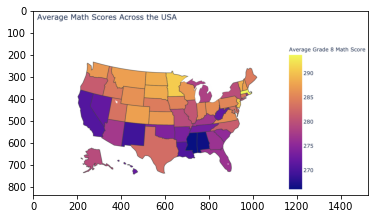

In [232]:
# Embedded Image of Above Visualization
from PIL import Image
import requests
import matplotlib.pyplot as plt

response = requests.get("https://user-images.githubusercontent.com/66976335/101938465-5b2f2a80-3bb1-11eb-9313-141295c7cffe.png", stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.show()

In the above visualization, we are displaying a choropleth of the United States displaying the average 8th grade math scores of each state across the years 1993-2016.



---



In [233]:
grouped_df = df

grouped_df = grouped_df.groupby("STATE", sort=False)["AVG_READING_8_SCORE"].mean().reset_index()\
        .rename(columns={"AVG_READING_8_SCORE":"Average Reading Score"})
grouped_df['STATE'] = grouped_df['STATE'].str.capitalize()
grouped_df['STATE'] = grouped_df.replace({'STATE':us_state_abbrev})

pex.choropleth(data_frame=grouped_df, locations='STATE', locationmode='USA-states', scope='usa', color='Average Reading Score', title='Average Grade 8 Reading Scores Across the USA')

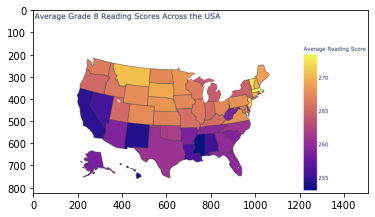

In [234]:
response = requests.get("https://user-images.githubusercontent.com/66976335/101938533-7e59da00-3bb1-11eb-85e9-fcb13bf7ed62.png", stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.show()

In the above visualization, we are displaying a choropleth of the United States displaying the average 8th grade reading scores of each state across the years 1993-2016. One point of interest between these first two visualizations is the distinction between higher testing scores in general in the north and lower testing scores in the south, particularly exemplified by the choropleth of the reading scores.



---



In [235]:
grouped_df = df_og_prices

grouped_df['instr percent'] = grouped_df['INSTRUCTION_EXPENDITURE'] / grouped_df['TOTAL_EXPENDITURE'] * 100
grouped_df = grouped_df.groupby("STATE", sort=False)["instr percent", "STATE"].mean().reset_index()\
        .rename(columns={"instr percent":"Percent of Total Expenditure"})
grouped_df['STATE'] = grouped_df['STATE'].str.capitalize()
grouped_df['STATE'] = grouped_df.replace({'STATE':us_state_abbrev})
grouped_df

pex.choropleth(data_frame=grouped_df, locations='STATE', locationmode='USA-states', scope='usa', color='Percent of Total Expenditure', title='Percent of Total Expenditure Spent on Education Across America')

<ipython-input-235-cc723cd6f4a1>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



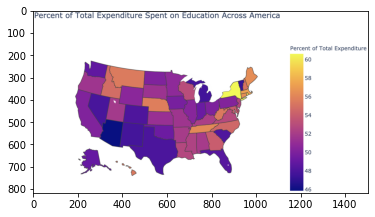

In [236]:
response = requests.get("https://user-images.githubusercontent.com/66976335/101938630-acd7b500-3bb1-11eb-8bcd-1494ebf48558.png", stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.show()

In this final US choropleth map, we display the percentage of total expenditure spent on education per state by taking the average of the total expenditure over the years and dividing it by the average of the educational expenditure over the years for each of the 50 states. In this choropleth, we can see that most states spend between 45%-60% of their state revenue on education and which states spend how much on this spectrum. New York shows a much higher education expenditure percentage than the other states, at 60.63%.




---



In [237]:
# We divide each monetary value by the population of the corresponding state and its respective year
df_w_pop = df
df_w_pop['POPULATION'] = df_w_pop.apply(lambda row : (int (df_state_pop.loc[row.YEAR, row.STATE])), axis=1)
df_w_pop = df_w_pop.sort_values(by=["YEAR"])
df_w_pop

STATE  YEAR  TOTAL_REV_PER_CAP  FEDERAL_REV_PER_CAP  \
0           ALABAMA  1993           1.119730             0.131248   
570     MISSISSIPPI  1993           0.737288             0.110186   
532       MINNESOTA  1993           1.786065             0.078502   
504        MICHIGAN  1993           1.923307             0.103576   
484   MASSACHUSETTS  1993           1.691512             0.084308   
...             ...   ...                ...                  ...   
307        ILLINOIS  2016           2.566896             0.181874   
572     MISSISSIPPI  2016           1.591532             0.231171   
814    NORTH_DAKOTA  2016           2.370981             0.206052   
258          HAWAII  2016           2.122868             0.182921   
1199        WYOMING  2016           3.499857             0.210559   

      STATE_REV_PER_CAP  LOCAL_REV_PER_CAP  TOTAL_EXP_PER_CAP  \
0              0.684852           0.303631           1.122123   
570            0.385812           0.241290           0.735349   
532            0.838961           0.868602           1.943222   
504            0.579867           1.239863           1.992468   
484            0.531725           1.075479           1.569282   
...                 ...                ...                ...   
307            0.940158           1.444864           2.576902   
572            0.807119           0.553242           1.550017   
814            1.306098           0.858831           2.602786   
258            1.898598           0.041348           1.914523   
1199           2.012785           1.276513           3.481987   

      INSTR_EXP_PER_CAP  SUPPORT_SERVICES_EXP_PER_CAP  OTHER_EXP_PER_CAP  \
0              3.570966                      0.314505           0.093947   
570            3.290406                      0.200876           0.056561   
532            5.857806                      0.487764           0.171276   
504            5.615843                      0.643140           0.124699   
484            6.234085                      0.475495           0.052954   
...                 ...                           ...                ...   
307            8.767827                      0.813240           0.077429   
572            4.951489                      0.519179           0.096135   
814            8.005333                      0.629186           0.156381   
258            8.066397                      0.631503           0.102897   
1199           9.750124                      1.002542           0.091696   

      CAPITAL_OUTLAY_EXP_PER_CAP  AVG_MATH_8_SCORE  AVG_READING_8_SCORE  \
0                       0.080872             262.0                253.0   
570                     0.055181             265.0                255.0   
532                     0.188131             295.0                270.0   
504                     0.162574             292.0                274.0   
484                     0.016368             287.0                273.0   
...                          ...               ...                  ...   
307                     0.157220             280.0                263.0   
572                     0.112140             265.0                255.0   
814                     0.546167             288.0                267.0   
258                     0.151763             278.0                257.0   
1199                    0.777628             284.0                267.0   

      POPULATION  
0        4194000  
570      2636000  
532      4522000  
504      9529000  
484      6011000  
...          ...  
307     12820527  
572      2987938  
814       754434  
258      1427559  
1199      584215  

[1200 rows x 14 columns]

In [238]:
fig = pex.scatter(df_w_pop, x="INSTR_EXP_PER_CAP", y="AVG_MATH_8_SCORE", size = "POPULATION", color = "STATE",
                    animation_frame = 'YEAR', animation_group = 'STATE',
                    range_x=[0,20], range_y=[250,310],
                    hover_name = "STATE", size_max = 50,
                    labels={"INSTR_EXP_PER_CAP": "Instruction Expenditure Per Capita","AVG_MATH_8_SCORE": "Grade 8 Math Scores", "STATE":"State", "POPULATION":"Population", "YEAR":"Year"},
                    title='Relationship between Instruction Expenditure Per Capita and Grade 8 Math Scores over Years')

#modify axis label properties
fig.update_xaxes(title_font={"size":18, "family": "Courier", "color":"gray"}, 
                 tickfont = {"size":16, "family": "Courier", "color":"gray"})
fig.update_yaxes(title_font={"size":18, "family": "Courier", "color":"gray"}, 
                            tickfont = {"size":16, "family": "Courier", "color":"gray"})

fig.show()

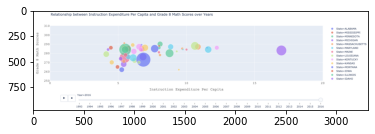

In [239]:
response = requests.get("https://user-images.githubusercontent.com/66976335/101957234-0f8b7980-3bcf-11eb-9ddc-bc57642c6e2d.png", stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.show()

Above, we have an animated bubble graph whose x-axis represents the instruction expenditure per capita in a given year and whose y-axis represents the 8th grade math scores in a given year. The size of the bubbles is indicative of the state’s population, and the animation displays the change in all three of these values (the axes and bubble size) over the years. In this way, we can see how changes in education expenditure affects 8th grade math testing scores over the span of 24 years.



---



---



In [240]:
fig = pex.scatter(df_w_pop, x="INSTR_EXP_PER_CAP", y="AVG_READING_8_SCORE", size = "POPULATION", color = "STATE",
                    animation_frame = 'YEAR', animation_group = 'STATE',
                    range_x=[0,20], range_y=[240,280],
                    hover_name = "STATE", size_max = 50,
                    labels={"INSTR_EXP_PER_CAP": "Instruction Expenditure Per Capita","AVG_READING_8_SCORE": "Grade 8 Reading Scores", "STATE":"State", "POPULATION":"Population", "YEAR":"Year"},
                    title='Relationship between Instruction Expenditure Per Capita and Grade 8 Reading Scores over Years')

#modify axis label properties
fig.update_xaxes(title_font={"size":18, "family": "Courier", "color":"gray"}, 
                 tickfont = {"size":16, "family": "Courier", "color":"gray"})
fig.update_yaxes(title_font={"size":18, "family": "Courier", "color":"gray"}, 
                            tickfont = {"size":16, "family": "Courier", "color":"gray"})

fig.show()

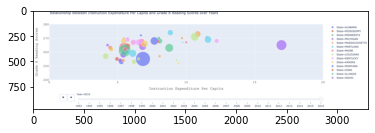

In [241]:
response = requests.get("https://user-images.githubusercontent.com/66976335/101957138-da7f2700-3bce-11eb-920c-60768debb9dd.png", stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.show()

Similarly, the animated bubble graph above displays the same information but for 8th grade reading scores instead of 8th grade math scores, allowing us to see how changes in education expenditure affects 8th grade math testing scores over the span of 24 years. In these two animated bubble graphs, we can see that there is a positive trend between expenditure and testing scores, and we can see that the education expenditure per capita overall tends to increase over time.



---



---



In [242]:
grouped_df = df

grouped_df = grouped_df.groupby("STATE", sort=False).mean().reset_index().rename(columns={"TOTAL_REV_PER_CAP":"Total Revenue Per Capita","TOTAL_EXP_PER_CAP":"Total Expenditure Per Capita","AVG_MATH_8_SCORE":"Average Math Score", "POPULATION":"Population"})
grouped_df

fig = pex.scatter_3d(grouped_df, x='Total Revenue Per Capita', y='Total Expenditure Per Capita', z='Population',
                    color='Average Math Score')
fig.show()

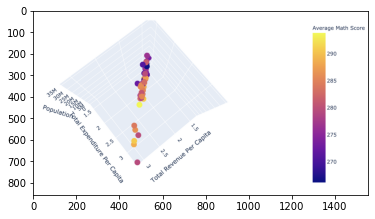

In [243]:
response = requests.get("https://user-images.githubusercontent.com/66976335/101973616-58f7bb00-3c07-11eb-8aa6-f184b3555cfa.png", stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.show()

The variables in this graph are the Total Expenditure Per Capita, Total Revenue Per Capita, State Population, and Average Grade 8 Math scores for the corresponding state from 1993-2016. This visualization reveals a cluster of lower math scores where the total revenue and expenditures are at their lower ends.



---



### 3.3. Model Construction


In [244]:
##### HYPOTHESIS TESTING -- MATH ##########
from scipy.stats import pearsonr

data1 = df['INSTR_EXP_PER_CAP']
data2 = df['AVG_MATH_8_SCORE']
stat, p = pearsonr(data1, data2)
print('Pearson Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No correlation between Instruction Expenditure per Capita and Average Grade 8 Math Scores')
else:
	print('Correlation between Instruction Expenditure per Capita and Average Grade 8 Math Scores is not 0')

Pearson Statistic=0.322, p=0.000
Correlation between Instruction Expenditure per Capita and Average Grade 8 Math Scores is not 0


For our first Pearson hypothesis test above, we test the correlation between states’ Instructure Expenditure Per Capita and the Grade 8 Math scores. We received a p-value of 0 and a Pearson Statistic value of 0.322. Because the p-value is less than our alpha level of 0.05, we can reject our null hypothesis that the correlation between the two attributes is 0. Since the Pearson statistic value of 0.322 is between 0 and 0.5, this indicates a weak positive association between the two attributes, meaning that as Instructure Expenditure Per Capita increases, the Grade 8 Math scores may tend to increase.



---



---



In [245]:
##### HYPOTHESIS TESTING -- READING ##########
from scipy.stats import pearsonr

data1 = df['INSTR_EXP_PER_CAP']
data2 = df['AVG_READING_8_SCORE']
stat, p = pearsonr(data1, data2)
print('Pearson Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No correlation between Instruction Expenditure per Capita and Average Grade 8 Reading Scores')
else:
	print('Correlation between Instruction Expenditure per Capita and Average Grade 8 Reading Scores is not 0')

Pearson Statistic=0.353, p=0.000
Correlation between Instruction Expenditure per Capita and Average Grade 8 Reading Scores is not 0


The Pearson Correlation hypothesis test above is similar to the first in that the only difference is the target variable. When testing the correlation between the Instruction Expenditure Per Capita and the Grade 8 Reading scores, we received a p-value of 0 and a Pearson Statistic value of 0.353. For the same reasons as before, we can reject our null hypothesis that the correlation between the two attributes is 0. The Pearson Statistic value indicates a weak association between Instruction Expenditure Per Capita and Grade 8 Reading scores, meaning that as Instructure Expenditure Per Capita increases the Grade 8 Reading scores may tend to increase as well.



---



In [246]:
##### HYPOTHESIS TESTING -- MATH ##########

from scipy.stats import pearsonr

data1 = df['TOTAL_REV_PER_CAP']
data2 = df['AVG_MATH_8_SCORE']
stat, p = pearsonr(data1, data2)
print('Pearson Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No correlation between Total Revenue per Capita and Average Grade 8 Math Scores')
else:
	print('Correlation between Total Revenue per Capita and Average Grade 8 Math Scores is not 0')

Pearson Statistic=0.328, p=0.000
Correlation between Total Revenue per Capita and Average Grade 8 Math Scores is not 0


The Pearson hypothesis tests above and below are between the Total State Revenue Per Capita and the Grade 8 test scores. With a target of math scores, the Pearson Statistic value was 0.328 and a p-value of 0. With a target of reading scores, the Pearson Statistic value was 0.317 and the p-value was 0. In both cases, we reject the null hypotheses that there are no correlations between the Total State Revenue Per Capita and either test score, indicating that there is a weak association between Total State Revenue Per Capita and Grade 8 Math scores, and Total State Revenue Per Capita and Grade 8 Reading scores. In both cases, an increase in one attribute indicates an increase in the other.

In [247]:
##### HYPOTHESIS TESTING -- READING ##########

from scipy.stats import pearsonr

data1 = df['TOTAL_REV_PER_CAP']
data2 = df['AVG_READING_8_SCORE']
stat, p = pearsonr(data1, data2)
print('Pearson Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No correlation between Total Revenue per Capita and Average Grade 8 Reading Scores')
else:
	print('Correlation between Total Revenue per Capita and Average Grade 8 Reading Scores is not 0')

Pearson Statistic=0.317, p=0.000
Correlation between Total Revenue per Capita and Average Grade 8 Reading Scores is not 0




---



---



In [248]:
## The models that we will be testing on

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
linear = LinearRegression()

from sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.linear_model import Lasso 
lasso = Lasso()

from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(max_iter= 1000000)


estimators_before_hypertuning = {"Linear Regression": linear, 
              "Ridge": ridge, 
              "Lasso": lasso, 
              "k-Nearest Neighbor": knn_regressor, 
              "Support Vector Machines": svm_reg}


### 3.4. Model Evaluation

In [249]:
# Applies the target and testing data corrsponding to the Math scores to each of the models
def regressors_on_dataset_MATH(estimators_set):
    print("Math Scores\n")
    for est in estimators_set:
        print(est, ":")
        model = estimators_set[est].fit(X=X_train_selected_scaledM, y=y_trainM)
        print("\tR-squared value for training set: ", r2_score(y_trainM, model.predict(X_train_selected_scaledM))) 
        print("\tR-squared value for testing set: ", r2_score(y_testM, model.predict(X_test_selected_scaledM)), "\n")


In [250]:
# Applies the target and testing data corrsponding to the Reading scores to each of the models
def regressors_on_dataset_READING(estimators_set):
    print("Reading Scores\n")
    for est in estimators_set:
        print(est, ":")
        model = estimators_set[est].fit(X=X_train_selected_scaledR, y=y_trainR)
        print("\tR-squared value for training set: ", r2_score(y_trainR, model.predict(X_train_selected_scaledR)))
        print("\tR-squared value for testing set: ", r2_score(y_testR, model.predict(X_test_selected_scaledR)), "\n")

In [251]:
# math results before hypertuning
regressors_on_dataset_MATH(estimators_before_hypertuning)

Math Scores

Linear Regression :
	R-squared value for training set:  0.2621039670504831
	R-squared value for testing set:  0.19546976548187256 

Ridge :
	R-squared value for training set:  0.26063087673063046
	R-squared value for testing set:  0.19926145588341282 

Lasso :
	R-squared value for training set:  0.0
	R-squared value for testing set:  -0.007985012751501763 

k-Nearest Neighbor :
	R-squared value for training set:  0.6862254075413792
	R-squared value for testing set:  0.49379685027430675 

Support Vector Machines :
	R-squared value for training set:  -1.7812273261080862
	R-squared value for testing set:  -2.384734162839654 



In [252]:
# reading results before hypertuning
regressors_on_dataset_READING(estimators_before_hypertuning)

Reading Scores

Linear Regression :
	R-squared value for training set:  0.38794955623352867
	R-squared value for testing set:  0.2858314635203052 

Ridge :
	R-squared value for training set:  0.387267477717147
	R-squared value for testing set:  0.29029177580477517 

Lasso :
	R-squared value for training set:  0.0
	R-squared value for testing set:  -3.940648246847367e-05 

k-Nearest Neighbor :
	R-squared value for training set:  0.7499919692644911
	R-squared value for testing set:  0.6042491505533867 

Support Vector Machines :
	R-squared value for training set:  -2.0176907706088243
	R-squared value for testing set:  -1.9225109851581745 



If the R-squared value for training data is greatly higher than that of the test data, this indicates that the training data is being overfitted. If the R-squared value for the training and testing data are both low, then this indicates that the model is not suitable for generalizing to new data, which is the case of underfitting.
For the Linear Regression and Ridge models for both Math and Reading scores, the R-squared value for the training data being greater than that of the testing data showed that the training data was being overfitted in both cases. The R-squared value for the training and testing sets for the Lasso model for both Math and Reading scores was approximately the same but significantly low, indicating that data is being underfitted. For the k-Nearest Neighbor Regression model for both Math and Reading scores, the R-squared value for the training sets were significantly higher than those of the testing sets, indicating that the training sets were overfitted here as well. For the Support Vector Machine models for both Math and Reading, the model is shown to be underfitting the data as implied by the significantly low R-squared values.



---



---



### 3.5. Model Optimization
We hypertuned all of the regression models we were testing in order to ensure that each model had been optimized to the maximum capacity. We did this because we wanted to make sure that model was performing at its best before comparing the R-squared results and selecting the one that was the most accurate. Additionally, we wanted to avoid overfitting our data.

In [253]:
from sklearn.model_selection import GridSearchCV

# Calculates best parameters for kNN model for target math
def grid_search_kNN_math():
    param_grid = {'metric':['euclidean', 'manhattan', 'minkowski'], 'n_neighbors': [1,3,5,7,10]}
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledM, y=y_trainM)
    
    print("kNN - Math:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledM, y_trainM))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledM, y_testM))

    return grid_search.best_params_

In [254]:
# Calculates best parameters for kNN model for target reading
def grid_search_kNN_reading():
    param_grid = {'metric':['euclidean', 'manhattan', 'minkowski'], 'n_neighbors': [1,3,5,7,10]}
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledR, y=y_trainR)
    
    print("kNN - Reading:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledR, y_trainR))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledR, y_testR))

    return grid_search.best_params_

In [255]:
knn_best_params_math = grid_search_kNN_math()

kNN - Math:
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5}
Training set score with best parameters:  0.6983305852662103
Test set score with best parameters:  0.510816596147611


In [256]:
knn_best_params_reading = grid_search_kNN_reading()

kNN - Reading:
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5}
Training set score with best parameters:  0.7643016460246956
Test set score with best parameters:  0.6197228081209397


In [257]:
# Calculates best parameters for Ridge model for target math
def grid_search_ridge_math():
    param_grid = {'alpha': [0.1, 0.3, 0.35, 0.375, 0.4, 0.5, 0.75, 1, 3, 7, 10]}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledM, y=y_trainM)
    
    print("Ridge - Math:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledM, y_trainM))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledM, y_testM))

    return grid_search.best_params_

In [258]:
# Calculates best parameters for Ridge model for target reading
def grid_search_ridge_reading():
    param_grid = {'alpha': [0.1, 0.3, 0.35, 0.375, 0.4, 0.5, 0.75, 1, 3, 7, 10]}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledR, y=y_trainR)
    
    print("Ridge - Reading:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledR, y_trainR))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledR, y_testR))

    return grid_search.best_params_

In [259]:
ridge_best_params_math = grid_search_ridge_math()

Ridge - Math:
Best parameters:  {'alpha': 0.375}
Training set score with best parameters:  0.261756186808777
Test set score with best parameters:  0.1972511632039946


In [260]:
ridge_best_params_reading = grid_search_ridge_reading()

Ridge - Reading:
Best parameters:  {'alpha': 1}
Training set score with best parameters:  0.387267477717147
Test set score with best parameters:  0.29029177580477517


In [261]:
# Calculates best parameters for SVM model for target math
def grid_search_SVR_math():
    param_grid = {'C': [1, 5, 7, 10, 15, 20, 25, 50]}
    grid_search = GridSearchCV(LinearSVR(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledM, y=y_trainM)
    
    print("LinearSVR - Math:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledM, y_trainM))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledM, y_testM))

    return grid_search.best_params_

In [262]:
# Calculates best parameters for SVM model for target reading
def grid_search_SVR_reading():
    param_grid = {'C': [1, 5, 7, 10, 15, 20, 25, 50]}
    grid_search = GridSearchCV(LinearSVR(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledR, y=y_trainR)
    
    print("LinearSVR - Reading:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledR, y_trainR))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledR, y_testR))

    return grid_search.best_params_

In [263]:
svm_best_params_math = grid_search_SVR_math()

LinearSVR - Math:
Best parameters:  {'C': 10}
Training set score with best parameters:  0.252420388727813
Test set score with best parameters:  0.18344764568969918


/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [264]:
svm_best_params_reading = grid_search_SVR_reading()

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/Sumana/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of

LinearSVR - Reading:
Best parameters:  {'C': 50}
Training set score with best parameters:  0.3803906477047806
Test set score with best parameters:  0.2550586924583744


In [265]:
# Calculates best parameters for Lasso model for target math
def grid_search_Lasso_math():
    param_grid = {'alpha': [0.1, 0.3, 0.35, 0.375, 0.4, 0.5, 0.75, 1, 3, 7, 10]}
    grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledM, y=y_trainM)
    
    print("LinearSVR - Math:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledM, y_trainM))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledM, y_testM))

    return grid_search.best_params_

In [266]:
# Calculates best parameters for Lasso model for target reading
def grid_search_Lasso_reading():
    param_grid = {'alpha': [0.1, 0.3, 0.35, 0.375, 0.4, 0.5, 0.75, 1, 3, 7, 10]}
    grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_scaledR, y=y_trainR)
    
    print("LinearSVR - Reading:")
    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    
    #the performance of the best found parameters on the training set
    print("Training set score with best parameters: ", grid_search.score(X_train_selected_scaledR, y_trainR))
    
    #the performance of the best found parameters on the test set
    print("Test set score with best parameters: ", grid_search.score(X_test_selected_scaledR, y_testR))

    return grid_search.best_params_

In [267]:
lasso_best_params_math = grid_search_Lasso_math()

LinearSVR - Math:
Best parameters:  {'alpha': 0.1}
Training set score with best parameters:  0.22857532074595144
Test set score with best parameters:  0.195989689215478


In [268]:
lasso_best_params_reading = grid_search_Lasso_reading()

LinearSVR - Reading:
Best parameters:  {'alpha': 0.1}
Training set score with best parameters:  0.3537537659897949
Test set score with best parameters:  0.2941146705705734


In [269]:
# recreating the models we are testing using the hypertuned parameters, specifically for target math
linear = LinearRegression()

ridgeM = Ridge(alpha = ridge_best_params_math.get('alpha'))

lassoM = Lasso(alpha = lasso_best_params_math.get('alpha'))

knn_regressorM = KNeighborsRegressor(metric=knn_best_params_math.get('metric'), n_neighbors=knn_best_params_math.get('n_neighbors'))

svm_regM = LinearSVR(C=svm_best_params_math.get('C'), max_iter= 1000000)

estimators_after_hypertuningM = {"Linear Regression": linear, 
              "Ridge": ridgeM, 
              "Lasso": lassoM, 
              "k-Nearest Neighbor": knn_regressorM, 
              "Support Vector Machines": svm_regM}


In [270]:
# recreating the models we are testing using the hypertuned parameters, specifically for target reading
ridgeR = Ridge(alpha = ridge_best_params_reading.get('alpha'))

lassoR = Lasso(alpha = lasso_best_params_reading.get('alpha'))

knn_regressorR = KNeighborsRegressor(metric=knn_best_params_reading.get('metric'), n_neighbors=knn_best_params_reading.get('n_neighbors'))

svm_regR = LinearSVR(C=svm_best_params_reading.get('C'), max_iter= 1000000)

estimators_after_hypertuningR = {"Linear Regression": linear, 
              "Ridge": ridgeR, 
              "Lasso": lassoR, 
              "k-Nearest Neighbor": knn_regressorR, 
              "Support Vector Machines": svm_regR}


### 3.6. Model Testing

In [271]:
# Testing our models post-hypertuning for target math
regressors_on_dataset_MATH(estimators_after_hypertuningM)

Math Scores

Linear Regression :
	R-squared value for training set:  0.2621039670504831
	R-squared value for testing set:  0.19546976548187256 

Ridge :
	R-squared value for training set:  0.261756186808777
	R-squared value for testing set:  0.1972511632039946 

Lasso :
	R-squared value for training set:  0.22857532074595144
	R-squared value for testing set:  0.195989689215478 

k-Nearest Neighbor :
	R-squared value for training set:  0.6983305852662103
	R-squared value for testing set:  0.510816596147611 

Support Vector Machines :
	R-squared value for training set:  0.25117597627307786
	R-squared value for testing set:  0.18647263980097784 



In [272]:
# Testing our models post-hypertuning for target reading
regressors_on_dataset_READING(estimators_after_hypertuningR)

Reading Scores

Linear Regression :
	R-squared value for training set:  0.38794955623352867
	R-squared value for testing set:  0.2858314635203052 

Ridge :
	R-squared value for training set:  0.387267477717147
	R-squared value for testing set:  0.29029177580477517 

Lasso :
	R-squared value for training set:  0.3537537659897949
	R-squared value for testing set:  0.2941146705705734 

k-Nearest Neighbor :
	R-squared value for training set:  0.7643016460246956
	R-squared value for testing set:  0.6197228081209397 

Support Vector Machines :
	R-squared value for training set:  0.38022127154138596
	R-squared value for testing set:  0.25501680641160607 



In [273]:
# All of the features
all_cols = list(features.columns)
all_cols

['TOTAL_REV_PER_CAP',
 'FEDERAL_REV_PER_CAP',
 'STATE_REV_PER_CAP',
 'LOCAL_REV_PER_CAP',
 'TOTAL_EXP_PER_CAP',
 'INSTR_EXP_PER_CAP',
 'SUPPORT_SERVICES_EXP_PER_CAP',
 'OTHER_EXP_PER_CAP',
 'CAPITAL_OUTLAY_EXP_PER_CAP']

In [274]:
to_removeM = selectM.get_support()
print("Booleans representing which features to keep and remove with Math scores as the target:")
to_removeM

Booleans representing which features to keep and remove with Math scores as the target:


array([ True,  True, False,  True,  True,  True,  True,  True, False])

In [275]:
to_removeR = selectR.get_support()
print("Booleans representing which features to keep and remove with Reading scores as the target:")
to_removeR

Booleans representing which features to keep and remove with Reading scores as the target:


array([ True,  True, False,  True,  True,  True,  True,  True, False])

In [276]:
# Columns selected from the original feature set (unscaled by MinMaxScaler) by our feature selection algorithm for target math
def keep_selected_cols_with_target_math():
    features_only_selectedM = features
    for i in range(len(to_removeM)):
        if ~to_removeM[i]:
            features_only_selectedM = features_only_selectedM.drop(columns=[all_cols[i]], axis=1)
    return features_only_selectedM

keep_selected_cols_with_target_math()

TOTAL_REV_PER_CAP  FEDERAL_REV_PER_CAP  LOCAL_REV_PER_CAP  \
0              1.119730             0.131248           0.303631   
1              1.509501             0.164923           0.482643   
2              1.842688             0.169665           0.564231   
3              1.541797             0.164003           0.535258   
4              1.136361             0.126950           0.301288   
...                 ...                  ...                ...   
1195           3.104520             0.291441           1.159877   
1196           3.020095             0.262519           1.212329   
1197           3.001591             0.200877           1.241281   
1198           2.515975             0.220440           1.016421   
1199           3.499857             0.210559           1.276513   

      TOTAL_EXP_PER_CAP  INSTR_EXP_PER_CAP  SUPPORT_SERVICES_EXP_PER_CAP  \
0              1.122123           3.570966                      0.314505   
1              1.539388           5.048220                      0.441998   
2              1.871588           5.922428                      0.565973   
3              1.585032           5.261611                      0.501618   
4              1.187262           3.766031                      0.316184   
...                 ...                ...                           ...   
1195           3.116235           9.993750                      0.993733   
1196           3.030517           9.824666                      0.980425   
1197           2.965327           9.532081                      0.967079   
1198           2.393802           7.183735                      0.764203   
1199           3.481987           9.750124                      1.002542   

      OTHER_EXP_PER_CAP  
0              0.093947  
1              0.123368  
2              0.134691  
3              0.123871  
4              0.117445  
...                 ...  
1195           0.097888  
1196           0.096678  
1197           0.092032  
1198           0.072186  
1199           0.091696  

[1200 rows x 7 columns]

In [277]:
# Columns selected from the original feature set (unscaled by MinMaxScaler) by our feature selection algorithm for target reading
def keep_selected_cols_with_target_reading():
    features_only_selectedR = features
    for i in range(len(to_removeR)):
        if ~to_removeR[i]:
            features_only_selectedR = features_only_selectedR.drop(columns=[all_cols[i]], axis=1)
    return features_only_selectedR

keep_selected_cols_with_target_reading()

TOTAL_REV_PER_CAP  FEDERAL_REV_PER_CAP  LOCAL_REV_PER_CAP  \
0              1.119730             0.131248           0.303631   
1              1.509501             0.164923           0.482643   
2              1.842688             0.169665           0.564231   
3              1.541797             0.164003           0.535258   
4              1.136361             0.126950           0.301288   
...                 ...                  ...                ...   
1195           3.104520             0.291441           1.159877   
1196           3.020095             0.262519           1.212329   
1197           3.001591             0.200877           1.241281   
1198           2.515975             0.220440           1.016421   
1199           3.499857             0.210559           1.276513   

      TOTAL_EXP_PER_CAP  INSTR_EXP_PER_CAP  SUPPORT_SERVICES_EXP_PER_CAP  \
0              1.122123           3.570966                      0.314505   
1              1.539388           5.048220                      0.441998   
2              1.871588           5.922428                      0.565973   
3              1.585032           5.261611                      0.501618   
4              1.187262           3.766031                      0.316184   
...                 ...                ...                           ...   
1195           3.116235           9.993750                      0.993733   
1196           3.030517           9.824666                      0.980425   
1197           2.965327           9.532081                      0.967079   
1198           2.393802           7.183735                      0.764203   
1199           3.481987           9.750124                      1.002542   

      OTHER_EXP_PER_CAP  
0              0.093947  
1              0.123368  
2              0.134691  
3              0.123871  
4              0.117445  
...                 ...  
1195           0.097888  
1196           0.096678  
1197           0.092032  
1198           0.072186  
1199           0.091696  

[1200 rows x 7 columns]

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

  To find the regression model that worked best with our dataset, we compared Linear Regression, Ridge, Lasso, kNN Regressor and LinearSVC. The algorithm that revealed the best performance was the kNN Regressor algorithm, and we were able to determine this by hyperparameter tuning all the models before comparing the R-squared results. When it came to the reading target outcome, kNN revealed a training set R-squared value of about 0.76 and a testing set R-squared value of about 0.62, which was by far the best result out of all the other algorithms. When it came to the math target outcome, kNN revealed a training set R-squared value of about 0.7 and a testing set R-squared value of about 0.5. We recognize that this indicates that our model is overfitted, but this is the highest accuracy we could get. This is because our data is not normally distributed. 

  We came to the conclusion that the algorithm that should be used as the predictive algorithm is the kNN Regression algorithm, as it was the most accurate when looking at the testing and training data. Based on our findings, we are able to somewhat predict the outcome variable we identified. We believe that we are able to with somewhat certainty due to the high value of our R-squared when looking at the reading outcome, but also understand that it wasn’t totally accurate. We are less optimistic about our results pertaining to the math score, as the correlation was less strong between our features and outcome in that situation. 

  As explained above, all four of our Pearson correlation hypothesis tests resulted in significant differences as the p-values for all were less than our alpha level of 0.05, therefore rejecting the null hypotheses that there were no correlations between the features we tested in each. The Pearson Statistic values for all four tests indicated a weak positive association between their respective tested variables as well.

  In our hypothesis in regards to the k-Nearest Neighbors Regression model, our null hypothesis was that the kNN model would result in R-squared values as good as the other models we tested so essentially the idea that there is no difference between them. Our alternative hypothesis was that the kNN Regression model would perform better than our other selected models. The results showed a significant difference in that the R-squared values of 0.619 for the Reading testing set and 0.5108 for the Math testing set from the kNN Regression model are over 200% greater than the R-squared values for the respective Reading and Math testing sets of all our four other models. 

  One thing our group would do is to do more research into contributing factors to higher test scores. We limited our data to what was provided in the Kaggle dataset we originally used and created our own dataset to normalize the values, but in the future, would like to add more possible factors. For example, it would be interesting to see if average income of the state played a factor in the test scores or median age, etc. By adding more possible features and then using this for feature selection, we could get a more comprehensive view into what could affect 8th grade math and reading test scores. Another thing we might’ve done is used StandardScalar() to preprocess the data along with MinMaxScalar() to see which yielded better results in preprocessing and for the R-squared scores. 


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
Throughout the entire process, each team member worked together and fully collaborated using video software. In terms of the written aspect of the report, Sanjana was responsible for executive summary, introduction, data wrangling, and parts of the discussion portion. Aditya was responsible for the data acquisition, data exploration, and model optimization.
Sumana was responsible for the data analysis, model evaluation, and parts of the discussion. We all looked over and edited each other’s work, and were in constant communication.